<a href="https://colab.research.google.com/github/tomshalini/SequenceReconstructionAndWalkSonification/blob/main/Copy_of_clustering_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Segmentation_Task/data.zip -d /content/drive/MyDrive/Segmentation_Task/

Archive:  /content/drive/MyDrive/Segmentation_Task/data.zip
replace /content/drive/MyDrive/Segmentation_Task/data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/Segmentation_Task/data.csv  
replace /content/drive/MyDrive/Segmentation_Task/__MACOSX/._data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# *Read the data*

In [407]:
df = pd.read_csv('/content/drive/MyDrive/Segmentation_Task/data.csv')

In [408]:
df.shape

(1377, 10)

In [409]:
df.head()

,Age,Gender,Employment,Status,Account_type_1,Account_type_2,Amount,Scale,Ziel,Risk
0,1.263158,male,1,A,NaN,A,3216.239316,21.0,auto,Pos
1,1.210526,female,2,NaN,D,NaN,6091.452991,36.0,eqpt,NaN
2,1.368421,male,2,A,D,C,1645.299145,24.0,eqpt,NaN
3,1.578947,male,3,NaN,A,NaN,1994.017094,NaN,entmt,Pos
4,1.052632,female,2,C,D,A,1742.735043,18.0,eqpt,NaN


In [410]:
df.tail()

,Age,Gender,Employment,Status,Account_type_1,Account_type_2,Amount,Scale,Ziel,Risk
1372,1.842105,female,2,B,A,NaN,4550.427350,NaN,auto,NaN
1373,1.421053,male,2,A,D,A,3035.897436,24.0,eqpt,NaN
1374,1.368421,male,2,A,NaN,NaN,4485.470085,21.0,auto,NaN
1375,1.894737,male,3,B,D,A,1600.000000,6.0,eqpt,NaN
1376,1.842105,male,2,A,NaN,B,3398.290598,21.0,eqpt,NaN


# *Exploring data before cleaning*

In [411]:
df.dtypes

Age               float64
Gender             object
Employment          int64
Status             object
Account_type_1     object
Account_type_2     object
Amount            float64
Scale             float64
Ziel               object
Risk               object
dtype: object

In [412]:
df.describe(include = 'all')

,Age,Gender,Employment,Status,Account_type_1,Account_type_2,Amount,Scale,Ziel,Risk
count,1237.000000,1377,1377.000000,1289,1107,834,1377.000000,1094.000000,1377,265
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,A,D,A,NaN,NaN,auto,Pos
freq,NaN,957,NaN,934,810,384,NaN,NaN,475,182
mean,1.866102,NaN,1.901961,NaN,NaN,NaN,2760.854453,20.538391,NaN,NaN
std,0.598961,NaN,0.637813,NaN,NaN,NaN,2357.443524,11.717000,NaN,NaN
min,1.000000,NaN,0.000000,NaN,NaN,NaN,213.675214,4.000000,NaN,NaN
25%,1.421053,NaN,2.000000,NaN,NaN,NaN,1155.555556,12.000000,NaN,NaN
50%,1.736842,NaN,2.000000,NaN,NaN,NaN,1978.632479,18.000000,NaN,NaN
75%,2.210526,NaN,2.000000,NaN,NaN,NaN,3375.213675,24.000000,NaN,NaN


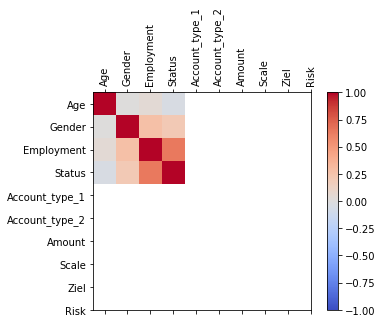

In [413]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [414]:
#Select Numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
print('Total numeric columns are:',len(numeric_cols))

['Age' 'Employment' 'Amount' 'Scale']
Total numeric columns are: 4


In [415]:
#Select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)
print('Total non-numeric columns are:',len(non_numeric_cols))

['Gender' 'Status' 'Account_type_1' 'Account_type_2' 'Ziel' 'Risk']
Total non-numeric columns are: 6


##### We have identified some information from the above code about the data types of the columns
##### We have 4 numeric columns and 6 non-numeric columns. However from domain knowledge we can identify that Employement is categorical column.


#### Now we check for dirty data and fix them one by one

## Let's Start

# 1. Missing Data
######  Handling missing data is one of the tricky and common part of data preprocessing. Most of the predictive models don't accept missing values in the dataset.
###### Below are the method we will use to visualize and detect the missing value in our dataset

<ul>
<li>Method 1 - Heatmap for missing data</li>
<li>Method 2 - Percentage list for missing data</li>
</ul>

###### Below are the techniques we will use to handle missing values

<ul>
<li>Technique 1 - Drop the observations</li>
<li>Technique 2 - Impute the missing</li>
<li>Technique 3 - Replace the missing</li>
</ul>

### *Method 1 - Heatmap for missing data*

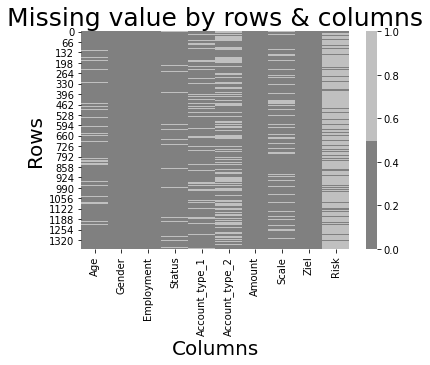

In [416]:
cols = df.columns[:] # all columns
colours = ['Grey', 'Silver'] # specify the colours - Silver is missing. Grey is not missing.
viz1 = sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Missing value by rows & columns', fontsize=25, color='Black')
plt.ylabel('Rows', fontsize=20, color='Black')
plt.xlabel('Columns', fontsize=20, color='Black')
plt.show(viz1)

###### The heatmap shows the missing value in silver color and available value in grey color.
###### X axis = Columns/feature
###### Y axis = Rows/records

### *Method 2 - Percentage for missing data by columns*

In [417]:
round(df.isnull().mean()*100,2) 

Age               10.17
Gender             0.00
Employment         0.00
Status             6.39
Account_type_1    19.61
Account_type_2    39.43
Amount             0.00
Scale             20.55
Ziel               0.00
Risk              80.76
dtype: float64

##### We have found out the missing values in our dataset now we have to handle these missing values. There is no fix process to handle the missing value but it depends on the feature/column in which missing value is present.
#### Lets look at these columns one by one using different missing data handeling techniques.

### *Technique 1 - Drop the row/observation or column/feature*
###### If the row or observation is not important for the prediction or we have less % of missing data than the original dataset then we can drop the entire observation.

In [418]:
X_train_preprocess = df.copy()
X_train_preprocess_without_risk = df.copy()  # Drop the feature 'Risk'

In [419]:
X_train_preprocess = X_train_preprocess.dropna(thresh = 6)
X_train_preprocess_without_risk = X_train_preprocess_without_risk.dropna(thresh = 6)

In [420]:
X_train_preprocess_without_risk = X_train_preprocess_without_risk.drop(columns=['Risk']) 

### *Technique 2 - Impute the Missing Value*
###### If the feature/column is useful then we must impute the missing value with mean/median/mode depending on the column.
###### For example, we can replace the age and scale with mean and Status with mode just to show how we can impute the missing value in the dataset.

### *2.1 Impute with Mean Value*

In [421]:
X_train_preprocess.describe(include = 'all')

,Age,Gender,Employment,Status,Account_type_1,Account_type_2,Amount,Scale,Ziel,Risk
count,1236.000000,1364,1364.000000,1282,1107,834,1364.000000,1089.000000,1364,265
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,A,D,A,NaN,NaN,auto,Pos
freq,NaN,951,NaN,930,810,384,NaN,NaN,469,182
mean,1.866462,NaN,1.896628,NaN,NaN,NaN,2759.538938,20.579431,NaN,NaN
std,0.599070,NaN,0.636632,NaN,NaN,NaN,2345.080349,11.728053,NaN,NaN
min,1.000000,NaN,0.000000,NaN,NaN,NaN,213.675214,4.000000,NaN,NaN
25%,1.407895,NaN,2.000000,NaN,NaN,NaN,1157.478632,12.000000,NaN,NaN
50%,1.736842,NaN,2.000000,NaN,NaN,NaN,1986.324786,18.000000,NaN,NaN
75%,2.210526,NaN,2.000000,NaN,NaN,NaN,3383.760684,24.000000,NaN,NaN


###### we can see that the missing value in Age and scale column are replaced by mean since mean value is near to 50% of quantille range.


In [422]:
# replace missing values with the mean.
def impute_numeric_missing_values(train_data):
    col = ['Age', 'Scale']
    mean = train_data[col].mean()
    train_data[col] = train_data[col].fillna(mean)
    return train_data

In [423]:
X_train_preprocess = impute_numeric_missing_values(X_train_preprocess)
X_train_preprocess_without_risk = impute_numeric_missing_values(X_train_preprocess_without_risk)

###### Now we will handle the missing value in Categorical column

### *2.2 Impute with mode Value* 


In [424]:
def impute_mising_value_with_mode(train_data):
    train_data['Status'] = train_data['Status'].fillna(train_data['Status'].mode()[0])
    return train_data

In [425]:
X_train_preprocess = impute_mising_value_with_mode(X_train_preprocess)
X_train_preprocess_without_risk = impute_mising_value_with_mode(X_train_preprocess_without_risk)

In [426]:
round(X_train_preprocess.isnull().mean()*100,2)

Age                0.00
Gender             0.00
Employment         0.00
Status             0.00
Account_type_1    18.84
Account_type_2    38.86
Amount             0.00
Scale              0.00
Ziel               0.00
Risk              80.57
dtype: float64

In [427]:
X_train_preprocess['Account_type_1'].value_counts()

D    810
B    147
A     82
C     68
Name: Account_type_1, dtype: int64

In [428]:
X_train_preprocess['Account_type_1'].isna().sum()

257

In [429]:
X_train_preprocess['Account_type_2'].isna().sum()

530

Since, missing value percentage is more in 'Account_type_1' and 'Account_type_2', replacing null values with mode is not a better options because of following reasons:


*   Features with maximum number of null values may give bias prediction if replace with most frequent value.
*   It distorts the most frequent label's relationship.

### *Technique 3 - Replace the missing*
#### *3.1 Create a new category for NAN values in Account_type_1 and Account_type_2* 
######    Simple and easy to implement and preserves the variance.

In [430]:
def impute_mising_value_with_new_category(train_data,col):
    train_data[col] = np.where(train_data[col].isnull(),"unknown",train_data[col])
    return train_data

In [431]:
X_train_preprocess = impute_mising_value_with_new_category(X_train_preprocess, col = ['Account_type_1', 'Account_type_2', 'Risk'])
X_train_preprocess_without_risk = impute_mising_value_with_new_category(X_train_preprocess_without_risk, col = ['Account_type_1', 'Account_type_2'])

In [432]:
round(X_train_preprocess.isnull().mean()*100,2)

Age               0.0
Gender            0.0
Employment        0.0
Status            0.0
Account_type_1    0.0
Account_type_2    0.0
Amount            0.0
Scale             0.0
Ziel              0.0
Risk              0.0
dtype: float64

In [433]:
round(X_train_preprocess_without_risk.isnull().mean()*100,2)

Age               0.0
Gender            0.0
Employment        0.0
Status            0.0
Account_type_1    0.0
Account_type_2    0.0
Amount            0.0
Scale             0.0
Ziel              0.0
dtype: float64

###### Now we can see that there are no missing value in the dataset
###### New dataset will be 'X_train_preprocess' and 'X_train_preprocess_without_risk' with no missing value

# 2. Taking care of Categorical Values

In [434]:
def one_hot_encoding(train_data, cols):
    train_data = pd.get_dummies(train_data, columns=cols)
    return train_data

In [435]:
X_train_preprocess = one_hot_encoding(X_train_preprocess, cols = ['Gender','Employment','Status','Account_type_1', 'Account_type_2', 'Risk', 'Ziel'])
X_train_preprocess_without_risk = one_hot_encoding(X_train_preprocess_without_risk, cols = ['Gender','Employment','Status','Account_type_1', 'Account_type_2', 'Ziel'])

In [436]:
X_train_preprocess

,Age,Amount,Scale,Gender_female,Gender_male,Employment_0,Employment_1,Employment_2,Employment_3,Status_A,Status_B,Status_C,Account_type_1_A,Account_type_1_B,Account_type_1_C,Account_type_1_D,Account_type_1_unknown,Account_type_2_A,Account_type_2_B,Account_type_2_C,Account_type_2_unknown,Risk_Neg,Risk_Pos,Risk_unknown,Ziel_apls,Ziel_auto,Ziel_edu,Ziel_entmt,Ziel_eqpt,Ziel_other,Ziel_prof,Ziel_rep
0,1.263158,3216.239316,21.000000,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,1.210526,6091.452991,36.000000,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,1.368421,1645.299145,24.000000,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,1.578947,1994.017094,20.579431,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,1.052632,1742.735043,18.000000,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,1.842105,4550.427350,20.579431,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1373,1.421053,3035.897436,24.000000,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1374,1.368421,4485.470085,21.000000,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1375,1.894737,1600.000000,6.000000,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [437]:
X_train_preprocess_without_risk

,Age,Amount,Scale,Gender_female,Gender_male,Employment_0,Employment_1,Employment_2,Employment_3,Status_A,Status_B,Status_C,Account_type_1_A,Account_type_1_B,Account_type_1_C,Account_type_1_D,Account_type_1_unknown,Account_type_2_A,Account_type_2_B,Account_type_2_C,Account_type_2_unknown,Ziel_apls,Ziel_auto,Ziel_edu,Ziel_entmt,Ziel_eqpt,Ziel_other,Ziel_prof,Ziel_rep
0,1.263158,3216.239316,21.000000,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
1,1.210526,6091.452991,36.000000,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1.368421,1645.299145,24.000000,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1.578947,1994.017094,20.579431,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1.052632,1742.735043,18.000000,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,1.842105,4550.427350,20.579431,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1373,1.421053,3035.897436,24.000000,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1374,1.368421,4485.470085,21.000000,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
1375,1.894737,1600.000000,6.000000,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


# 3. Normalizing the dataset

In [465]:
def normalize_data(train_data):
    ss = StandardScaler()  
    train_data.iloc[:,:3] = ss.fit_transform(train_data.iloc[:,:3])
    return train_data

In [466]:
X_train_preprocess = normalize_data(X_train_preprocess)
X_train_preprocess_without_risk = normalize_data(X_train_preprocess_without_risk)

# 4. Clustering Algorithms

#### Find Optimal number of Clusters using evaluatgion metric Silhouette Score

In [490]:
def plot_and_save_fig(x, y, colr, title, x_label, y_label, filename, model = None):
    fig = plt.figure()
    plt.title(title)
    plt.scatter(x, y, c= colr)
    if model != None:
      plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    fig.savefig(filename)
    plt.show()

In [498]:
def find_optimal_num_clusters(X_train_preprocess, clustering_algo_type):
    
    scores = []
    wcss = []
    values = np.arange(2, 10)
    for num_clusters in values:
        
        if clustering_algo_type == 'kmeans':
            model = KMeans(n_clusters=num_clusters, init ='k-means++', max_iter=300,  n_init=10, random_state=0 )
            model.fit(X_train_preprocess)
            labels_pred = model.labels_
            wcss.append(model.inertia_) 
                       
        else:
            model = GaussianMixture(n_components=num_clusters)
            model.fit(X_train_preprocess)
            labels_pred = model.predict(X_train_preprocess)
        
        score = metrics.silhouette_score(X_train_preprocess, labels_pred, metric = 'euclidean', sample_size = len(X_train_preprocess))
        print("\nNumber of clusters using "+clustering_algo_type+"= ", num_clusters)
        print("Silhouette score =", score)
        scores.append(score)
    if clustering_algo_type == 'kmeans':
      plot_and_save_fig(values, wcss, 'red', 'The Elbow Method Graph', 'Number of clusters', 'WCSS', 'elbow_kmeans.png' )
    num_clusters = np.argmax(scores) + values[0]
    print('\nOptimal number of clusters using '+clustering_algo_type+'= ',  num_clusters)

    return num_clusters

#### Apply Clustering Algorithms using optimal number of clusters from previous method

In [472]:
def apply_clustering_algo(X_train_preprocess, n_clusters, clustering_algo_type):
    if clustering_algo_type == 'kmeans':
        model = KMeans(n_clusters = n_clusters)
        model.fit(X_train_preprocess)
    else:
        model = GaussianMixture(n_components = n_clusters)
        model.fit(X_train_preprocess)
    
    pred = model.predict(X_train_preprocess)

    X_train_preprocess['labels'] = pred
    return X_train_preprocess, model

#### Encode labels generated using clustering

In [473]:
def cluster_label_encoder(X_train_preprocess):
    encoding=LabelEncoder()
    target_encoded=encoding.fit(X_train_preprocess['labels']).transform(X_train_preprocess['labels'])
    return target_encoded

#### TSNE Visualization

In [474]:
def tsne_visualization(X_train_preprocess, file_name_indicator, target_encoded, model):
    tsne = TSNE(n_components=2,learning_rate=300,perplexity = 30,early_exaggeration = 12,init = 'random',  random_state=0)
    tsne_results = tsne.fit_transform(X_train_preprocess)
    tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
    filename = 'tsne_clusters_visualiazion_'+file_name_indicator+'.png'
    plot_and_save_fig(tsne_results['tsne1'], tsne_results['tsne2'], target_encoded, 'TSNE Visualiazation of Customer Data', 'TSNE1', 'TSNE2', filename, model)

#### PCA on clustered dataset

In [475]:
def pca(X_train_preprocess, file_name_indicator, target_encoded, model):
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(X_train_preprocess)
    X_train_preprocess['pca-one'] = pca_result[:,0]
    X_train_preprocess['pca-two'] = pca_result[:,1] 
    X_train_preprocess['pca-three'] = pca_result[:,2]
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
    filename = 'pca_clusters_visualiazion_'+file_name_indicator+'.png'
    plot_and_save_fig(X_train_preprocess['pca-one'], X_train_preprocess['pca-two'], target_encoded, 'PCA Visualization of Customer Data', 'PC1', 'PC2', filename, model)

## 4.1 K-means Clustering

### 4.1.1 Apply K-means Clustering on all featuers


Number of clusters using kmeans=  2
Silhouette score = 0.23482872767721968

Number of clusters using kmeans=  3
Silhouette score = 0.1554242022607203

Number of clusters using kmeans=  4
Silhouette score = 0.13831714855410854

Number of clusters using kmeans=  5
Silhouette score = 0.13395010077098304

Number of clusters using kmeans=  6
Silhouette score = 0.10848103640101747

Number of clusters using kmeans=  7
Silhouette score = 0.10585768629056568

Number of clusters using kmeans=  8
Silhouette score = 0.09977835907349024

Number of clusters using kmeans=  9
Silhouette score = 0.09992410374403733


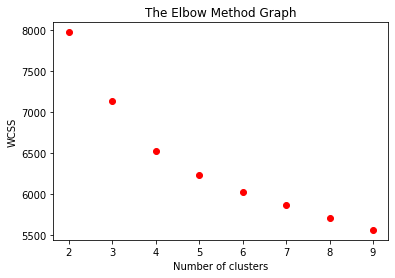


Optimal number of clusters using kmeans=  2


In [491]:
num_clusters = find_optimal_num_clusters(X_train_preprocess, 'kmeans') 
clustered_data_preprocessed, model = apply_clustering_algo(X_train_preprocess, 3, 'kmeans')
# Encode labels generated using clustering
target_encoded = cluster_label_encoder(clustered_data_preprocessed)
clustered_data_preprocessed = clustered_data_preprocessed.drop(columns=['labels']) 

### 4.1.2 TSNE visualization on all Features

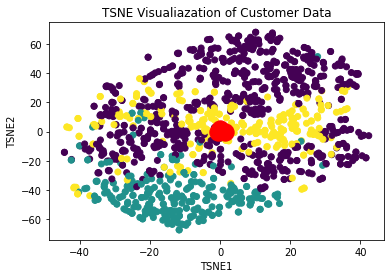

In [492]:
tsne_visualization(clustered_data_preprocessed, 'kmeans_with_all_features', target_encoded, model)

### 4.1.3 PCA using all features

Explained variation per principal component: [0.23980039 0.15790939 0.07163518]


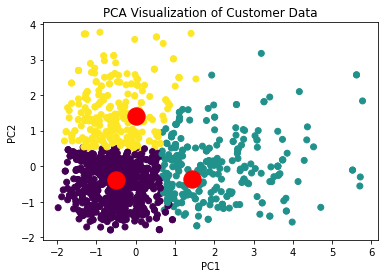

In [493]:
pca(clustered_data_preprocessed, 'kmeans_with_all_features', target_encoded, model)

### 4.1.4 Apply K-means Clustering without Feature 'Risk'


Number of clusters using kmeans=  2
Silhouette score = 0.21370457702685772

Number of clusters using kmeans=  3
Silhouette score = 0.16031882968488073

Number of clusters using kmeans=  4
Silhouette score = 0.11735360124593963

Number of clusters using kmeans=  5
Silhouette score = 0.10554607822601336

Number of clusters using kmeans=  6
Silhouette score = 0.09316766506438354

Number of clusters using kmeans=  7
Silhouette score = 0.10108214623820387

Number of clusters using kmeans=  8
Silhouette score = 0.0985434523571848

Number of clusters using kmeans=  9
Silhouette score = 0.08673203120366774


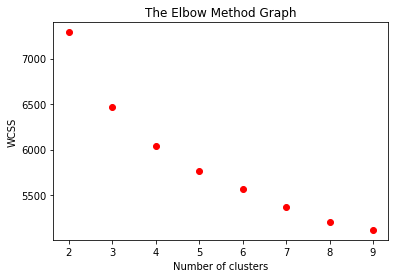


Optimal number of clusters using kmeans=  2


In [494]:
num_clusters = find_optimal_num_clusters(X_train_preprocess_without_risk, 'kmeans') 
clustered_data_preprocessed_without_risk, model = apply_clustering_algo(X_train_preprocess_without_risk, num_clusters, 'kmeans')
# Encode labels generated using clustering
target_encoded = cluster_label_encoder(clustered_data_preprocessed_without_risk)
clustered_data_preprocessed_without_risk = clustered_data_preprocessed_without_risk.drop(columns=['labels']) 

### 4.1.5 TSNE visualization without Feature 'Risk'

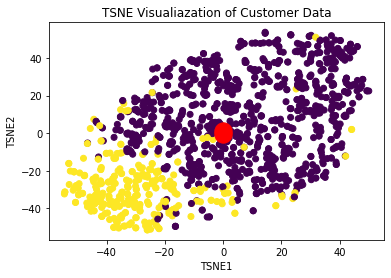

In [495]:
tsne_visualization(clustered_data_preprocessed_without_risk, 'kmeans_without_risk', target_encoded, model)



### 4.1.6 PCA using without Feature 'Risk'

Explained variation per principal component: [0.25198134 0.16589701 0.07522038]


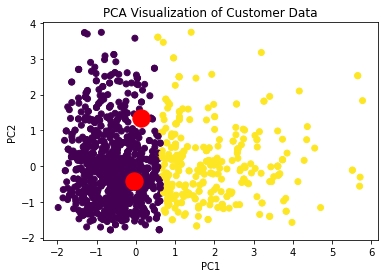

In [496]:
pca(clustered_data_preprocessed_without_risk, 'kmeans_without_risk', target_encoded, model)

## 4.2 Guassian Mixture Model Clustering

### 4.2.1 Apply Guassian Mixture Model Clustering on all featuers

In [499]:
num_clusters = find_optimal_num_clusters(X_train_preprocess, 'guassian') 
clustered_data_preprocessed, model = apply_clustering_algo(X_train_preprocess, num_clusters, 'guassian')
# Encode labels generated using clustering
target_encoded = cluster_label_encoder(clustered_data_preprocessed)
#clustered_data_preprocessed = clustered_data_preprocessed.drop(columns=['labels']) 


Number of clusters using guassian=  2
Silhouette score = 0.026455613051863284

Number of clusters using guassian=  3
Silhouette score = 0.22692333283784155

Number of clusters using guassian=  4
Silhouette score = 0.13452426398708173

Number of clusters using guassian=  5
Silhouette score = 0.11550996133069331

Number of clusters using guassian=  6
Silhouette score = 0.07281770383750029

Number of clusters using guassian=  7
Silhouette score = 0.0651319749663325

Number of clusters using guassian=  8
Silhouette score = 0.046279488036642315

Number of clusters using guassian=  9
Silhouette score = 0.0685797227347237

Optimal number of clusters using guassian=  3


### 4.2.2 TSNE visualization on all Features

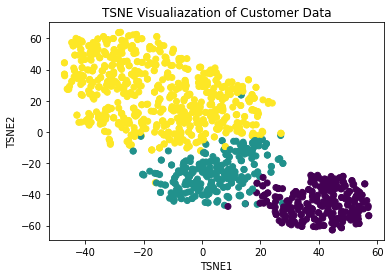

In [501]:
tsne_visualization(clustered_data_preprocessed, 'guassian_with_all_features', target_encoded, None)

### 4.2.3 PCA using all features

Explained variation per principal component: [0.27410703 0.15091374 0.06528664]


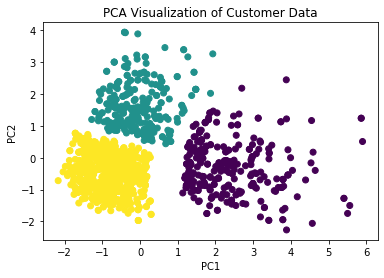

In [502]:
pca(clustered_data_preprocessed, 'guassian_with_all_features', target_encoded, None)

### 4.2.4 Apply guassian mixture model Clustering without Feature 'Risk'

In [503]:
num_clusters = find_optimal_num_clusters(X_train_preprocess_without_risk, 'guassian') 
clustered_data_preprocessed_without_risk, model = apply_clustering_algo(X_train_preprocess_without_risk, num_clusters, 'guassian')
# Encode labels generated using clustering
target_encoded = cluster_label_encoder(clustered_data_preprocessed_without_risk)
#clustered_data_preprocessed_without_risk = clustered_data_preprocessed_without_risk.drop(columns=['labels']) 


Number of clusters using guassian=  2
Silhouette score = 0.23854125591261865

Number of clusters using guassian=  3
Silhouette score = 0.10964649266045116

Number of clusters using guassian=  4
Silhouette score = 0.08336477593859845

Number of clusters using guassian=  5
Silhouette score = 0.09803605126003086

Number of clusters using guassian=  6
Silhouette score = 0.02636555698734375

Number of clusters using guassian=  7
Silhouette score = 0.0680936194829395

Number of clusters using guassian=  8
Silhouette score = 0.05388772251559017

Number of clusters using guassian=  9
Silhouette score = 0.04961896003673991

Optimal number of clusters using guassian=  2


### 4.2.5 TSNE visualization without Feature 'Risk'

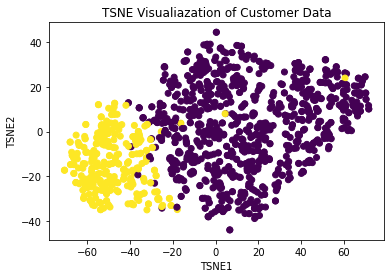

In [505]:
tsne_visualization(clustered_data_preprocessed_without_risk, 'guassian_without_risk', target_encoded, None)



### 4.2.6 PCA using without Feature 'Risk'

Explained variation per principal component: [0.2636082  0.16145235 0.07322104]


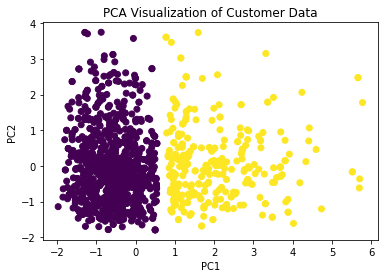

In [506]:
pca(clustered_data_preprocessed_without_risk, 'kmeans_without_risk', target_encoded, None)

In [ ]:
clustered_data_preprocessed_without_risk.to_csv('labesl_for_comparison_with_model_prediction.csv')